In [1]:
#4.2回归分析
#导入库
import numpy as np
from sklearn.linear_model import BayesianRidge,LinearRegression,ElasticNet #批量导入要实现的回归算法
from sklearn.svm import SVR #SVM中的回归算法
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor #继承算法
from sklearn.model_selection import cross_val_score #交叉检验
from sklearn.metrics import explained_variance_score,mean_absolute_error,mean_squared_error,r2_score #批量导入指标算法
import pandas as pd 
import matplotlib.pyplot as plt #导入图形演示库

In [4]:
#数据准备
raw_data=np.loadtxt('/Users/yezhibin/Downloads/书/数据分析书/python_book/chapter4/regression.txt')
X=raw_data[:,:-1]
y=raw_data[:,-1]


In [5]:
#训练回归模型
n_folds=6
model_br=BayesianRidge() #建立贝叶斯岭回归模型对象
model_lr=LinearRegression() #建立普通线性回归模型对象
model_etc=ElasticNet() #建立弹性网络回归模型对象
model_svr=SVR() #建立支持向量机回归模型对象
model_gbr=GradientBoostingRegressor() #建立梯度增强回归模型对象
model_names=['BayesianRidge','LinearRegression','ElasticNet','SVR','GBR'] #建立不同模型的名称列表
model_dic=[model_br,model_lr,model_etc,model_svr,model_gbr] #不同回归模型对象的集合
cv_score_list=[]
pre_y_list=[] #各个回归模型预测的y值列表
for model in model_dic: #读出每个回归模型对象
    scores=cross_val_score(model,X,Y,cv=n_folds)
    cv_score_list.append(scores)
    pre_y_list.append(model.fit(X,Y).predict(X))

In [11]:
n_samples, n_features = X.shape  # 总样本量,总特征数
model_metrics_name = [explained_variance_score, mean_absolute_error, mean_squared_error, r2_score]  # 回归评估指标对象集
model_metrics_list = []  # 回归评估指标列表
for i in range(5):  # 循环每个模型索引
    tmp_list = []  # 每个内循环的临时结果列表
    for m in model_metrics_name:  # 循环每个指标对象
        tmp_score = m(y, pre_y_list[i])  # 计算每个回归指标结果
        tmp_list.append(tmp_score)  # 将结果存入每个内循环的临时结果列表
    model_metrics_list.append(tmp_list)  # 将结果存入回归评估指标列表
df1 = pd.DataFrame(cv_score_list, index=model_names)  # 建立交叉检验的数据框
df2 = pd.DataFrame(model_metrics_list, index=model_names, columns=['ev', 'mae', 'mse', 'r2'])  # 建立回归指标的数据框
print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量

samples: 506 	 features: 13


In [14]:
print ('samples: %d \t features: %d' % (n_samples, n_features))  # 打印输出样本量和特征数量
print (70 * '-')  # 打印分隔线
print ('cross validation result:')  # 打印输出标题
print (df1)  # 打印输出交叉检验的数据框
print (70 * '-')  # 打印分隔线
print ('regression metrics:')  # 打印输出标题
print (df2)  # 打印输出回归指标的数据框
print (70 * '-')  # 打印分隔线
print ('short name \t full name')  # 打印输出缩写和全名标题
print ('ev \t explained_variance')
print ('mae \t mean_absolute_error')
print ('mse \t mean_squared_error')
print ('r2 \t r2')
print (70 * '-')  # 打印分隔线

samples: 506 	 features: 13
----------------------------------------------------------------------
cross validation result:
                         0         1         2         3         4         5
BayesianRidge     0.662422  0.677079  0.549702  0.776896 -0.139738 -0.024448
LinearRegression  0.642240  0.611521  0.514471  0.785033 -0.143673 -0.015390
ElasticNet        0.582476  0.603773  0.365912  0.625645  0.437122  0.200454
SVR              -0.000799 -0.004447 -1.224386 -0.663773 -0.122252 -1.374062
GBR               0.749839  0.786680  0.768261  0.865462  0.375816  0.553360
----------------------------------------------------------------------
regression metrics:
                        ev       mae        mse        r2
BayesianRidge     0.731143  3.319204  22.696772  0.731143
LinearRegression  0.740608  3.272945  21.897779  0.740608
ElasticNet        0.686094  3.592915  26.499828  0.686094
SVR               0.173548  5.447960  71.637552  0.151410
GBR               0.975126  1.151

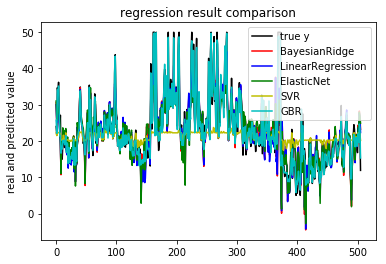

In [15]:
plt.figure()  # 创建画布
plt.plot(np.arange(X.shape[0]), y, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c']  # 颜色列表
linestyle_list = ['-', '.', 'o', 'v', '*']  # 样式列表
for i, pre_y in enumerate(pre_y_list):  # 读出通过回归模型预测得到的索引及结果
    plt.plot(np.arange(X.shape[0]), pre_y_list[i], color_list[i], label=model_names[i])  # 画出每条预测结果线
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像

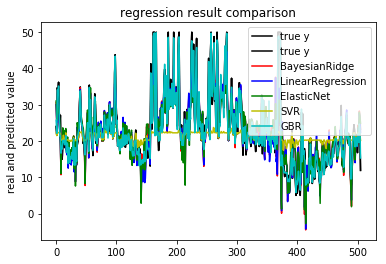

In [21]:
#模型效果可视化
plt.figure()
plt.plot(np.arange(X.shape[0]),y,color='k',label='true y')
#color_list=['r','b','g','y','c']

#plt.figure()  # 创建画布
plt.plot(np.arange(X.shape[0]), y, color='k', label='true y')  # 画出原始值的曲线
color_list = ['r', 'b', 'g', 'y', 'c']  # 颜色列表

linestyle_list=['-','.','o','v','*']
for i,pre_y in enumerate(pre_y_list):
    plt.plot(np.arange(X.shape[0]),pre_y_list[i],color_list[i],label=model_names[i])
    
plt.title('regression result comparison')  # 标题
plt.legend(loc='upper right')  # 图例位置
plt.ylabel('real and predicted value')  # y轴标题
plt.show()  # 展示图像

In [22]:
print ('regression prediction')
new_point_set = [[1.05393, 0., 8.14, 0., 0.538, 5.935, 29.3, 4.4986, 4., 307., 21., 386.85, 6.58],
                 [0.7842, 0., 8.14, 0., 0.538, 5.99, 81.7, 4.2579, 4., 307., 21., 386.75, 14.67],
                 [0.80271, 0., 8.14, 0., 0.538, 5.456, 36.6, 3.7965, 4., 307., 21., 288.99, 11.69],
                 [0.7258, 0., 8.14, 0., 0.538, 5.727, 69.5, 3.7965, 4., 307., 21., 390.95, 11.28]]  # 要预测的新数据集
for i, new_point in enumerate(new_point_set):  # 循环读出每个要预测的数据点
    new_pre_y = model_gbr.predict(np.array(new_point).reshape(1,-1))  # 使用GBR进行预测
    print ('predict for new point %d is:  %.2f' % (i + 1, new_pre_y))  # 打印输出每个数据点的预测信息


regression prediction
predict for new point 1 is:  21.49
predict for new point 2 is:  16.84
predict for new point 3 is:  19.50
predict for new point 4 is:  19.16
